In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib 
import seaborn as sns

# 분석목적: 학력, 교육연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용해 연봉 예측하기
**연봉이 5만달러 이상인지 아닌지**

* age: 나이
* workclass: 고용형태
* education: 학력
* education-num: 교육연수
* marital-status: 혼인상태
* occupation: 직업
* relationship: 가족관계
* race: 인종
* sex: 성별
* capital-gain: 자산증가
* capital-loss: 자산감소
* hours-per-week: 주당 노동 시간
* native-country: 본국
* class: 연봉구분 - target(분석대상)

지도학습, Desci...tree 어쩌구 데이터셋으로 분석할것

In [3]:
df = pd.read_csv("./data/salary2.csv")
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [235]:
df.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [236]:
df['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48842 entries, 0 to 48841
Series name: age
Non-Null Count  Dtype
--------------  -----
48842 non-null  int64
dtypes: int64(1)
memory usage: 381.7 KB


### 결측값 매꾸기

In [237]:
# workclass 처리 
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [238]:
workclass_naidx = df[df['workclass'].isna()].index

In [239]:
df['workclass'].mode()[0]

' Private'

In [240]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

In [241]:
df['workclass'].isna().sum()

np.int64(0)

In [242]:
df.loc[workclass_naidx]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,Private,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,Private,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,Private,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,Private,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,Private,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,Private,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,Private,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,Private,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,Private,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [243]:
# 직업 처리 
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [244]:
df['occupation'].isna().sum()

np.int64(2809)

In [245]:
df[df['occupation'].isna()].index

Index([    4,     6,    13,    22,    35,    75,    89,   100,   113,   132,
       ...
       48707, 48758, 48771, 48775, 48806, 48811, 48812, 48820, 48822, 48823],
      dtype='int64', length=2809)

In [246]:
df = df.drop(df[df['occupation'].isna()].index)

In [247]:
df['occupation'].isna().sum()

np.int64(0)

In [248]:
# 본국 처리
df['native-country'].value_counts()

native-country
United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

In [249]:
df[df['native-country'].isna()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
65,41,Private,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,NaN,<=50K
83,44,Self-emp-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,NaN,>50K
188,34,State-gov,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,NaN,<=50K
253,42,Federal-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48694,45,Private,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,NaN,<=50K
48730,44,Self-emp-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
48750,58,Self-emp-inc,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
48773,42,Self-emp-not-inc,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,NaN,<=50K


In [250]:
native_country_naidx = df[df['native-country'].isna()].index

In [21]:
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [22]:
df.loc[native_country_naidx]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,United-States,>50K
65,41,Private,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
83,44,Self-emp-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,United-States,>50K
188,34,State-gov,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,United-States,<=50K
253,42,Federal-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48694,45,Private,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
48730,44,Self-emp-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
48750,58,Self-emp-inc,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,United-States,<=50K
48773,42,Self-emp-not-inc,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,United-States,<=50K


In [23]:
df['native-country'].isna().sum()

np.int64(0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46033 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             46033 non-null  int64 
 1   workclass       46033 non-null  object
 2   education       46033 non-null  object
 3   education-num   46033 non-null  int64 
 4   marital-status  46033 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    46033 non-null  object
 7   race            46033 non-null  object
 8   sex             46033 non-null  object
 9   capital-gain    46033 non-null  int64 
 10  capital-loss    46033 non-null  int64 
 11  hours-per-week  46033 non-null  int64 
 12  native-country  46033 non-null  object
 13  class           46033 non-null  object
dtypes: int64(5), object(9)
memory usage: 6.3+ MB


### 이상치 처리

In [496]:
df.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,46033.000000,46033,46033,46033.000000,46033,46033,46033,46033,46033,46033.000000,46033.000000,46033.000000,46033,46033
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,14972,NaN,21451,6172,19005,39444,31114,NaN,NaN,NaN,42103,34611
mean,38.556601,NaN,NaN,10.128929,NaN,NaN,NaN,NaN,NaN,1114.332653,88.729346,40.948407,NaN,NaN
std,13.204268,NaN,NaN,2.564064,NaN,NaN,NaN,NaN,NaN,7589.571484,405.316932,12.011069,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


<Axes: >

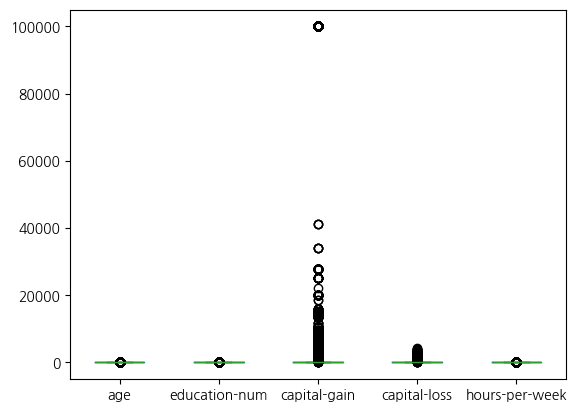

In [497]:
df.plot(kind="box")

In [498]:
des = df.describe()
des

,age,education-num,capital-gain,capital-loss,hours-per-week
count,46033.000000,46033.000000,46033.000000,46033.000000,46033.000000
mean,38.556601,10.128929,1114.332653,88.729346,40.948407
std,13.204268,2.564064,7589.571484,405.316932,12.011069
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [499]:
df['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
       99999,  2597,  2907,  4650,  6497,  5013, 27828,  4934,  4064,
        3674,  2174, 10605,  1055,   114,  2580,  3411,  4508,  4386,
        8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471, 10566,
        2354,  1424,  1455,  3325,  4416, 25236,  4787,  2829,  4865,
        1264,  1506,   594, 10520,  3464, 20051,  4101,  1797,  2407,
        3471,  2653,  1086,  1848, 14344,  1151,  2993,  2290, 15020,
        9386,  2202,  3818,  2176,  5455,  3418, 11678,  7978,  7262,
        6514, 41310,  3456,  7430,  2062, 34095,  1831,  6723,  5060,
       15831,  2977,  2346,  3273,  2329,  9562,  2105,  2635,  2414,
        4931,  1731,  6097,   914,  7896,  5556,  3781,  3942,  2538,
        3887,  1409, 25124,  7443,  5721,   401,  1173,  4687,  6767,
        2961,   991,  2036,  2050,  2228, 22040,  2936,  6360,  2009,
        3432,  1639, 18481,  2387])

In [500]:
df[df['capital-gain']!=0]['capital-gain'].value_counts().sort_values(ascending=False)

capital-gain
15024    508
7688     402
7298     358
99999    239
3103     146
        ... 
7262       1
1731       1
22040      1
1639       1
2387       1
Name: count, Length: 120, dtype: int64

In [501]:
df[df['capital-gain']!=0]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
14,48,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
25,45,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,66,Federal-gov,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,<=50K
48799,57,Local-gov,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
48819,38,Private,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
48829,65,Self-emp-not-inc,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K


In [427]:
df.df[df['capital-gain']==99999].index

AttributeError: 'DataFrame' object has no attribute 'df'

In [80]:
df[df['capital-loss']!=0]['capital-loss'].value_counts()

capital-loss
1902    301
1977    251
1887    230
2415     71
1485     68
       ... 
4356      1
419       1
2080      1
155       1
2201      1
Name: count, Length: 96, dtype: int64

In [83]:
df[df['capital-loss']!=0]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
52,21,Private,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,1721,24,United-States,<=50K
82,24,Private,Some-college,10,Separated,Other-service,Not-in-family,White,Male,0,1876,40,United-States,<=50K
129,41,Private,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,United-States,>50K
143,43,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,45,United-States,>50K
154,40,State-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,1887,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48722,53,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,45,United-States,>50K
48724,18,Private,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,1602,20,United-States,<=50K
48726,61,Private,HS-grad,9,Widowed,Craft-repair,Not-in-family,Black,Female,0,1669,50,United-States,<=50K
48739,36,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,45,United-States,>50K


In [78]:
df[(df['capital-loss']!=0) & (df['capital-gain']!=0)]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class


In [169]:
df[(df['capital-loss']==0) & (df['capital-gain']==0)]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [71]:
df[df['capital-gain']!=0].describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,3861.000000,3861.000000,3861.000000,3861.0,3861.000000
mean,43.674696,11.117586,13285.696711,0.0,44.001036
std,12.904526,2.655555,22916.685280,0.0,11.973351
min,17.000000,1.000000,114.000000,0.0,1.000000
25%,34.000000,9.000000,3464.000000,0.0,40.000000
50%,42.000000,11.000000,7298.000000,0.0,40.000000
75%,52.000000,13.000000,14084.000000,0.0,50.000000
max,90.000000,16.000000,99999.000000,0.0,99.000000


In [64]:
df['capital-gain'].describe()

count    46033.000000
mean      1114.332653
std       7589.571484
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

<Axes: ylabel='Frequency'>

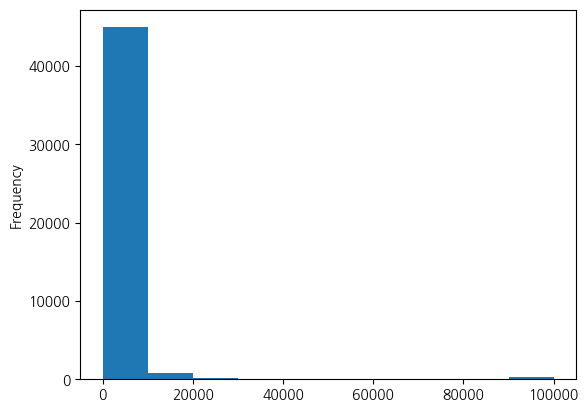

In [58]:
df['capital-gain'].plot(kind="hist")

In [285]:
des.loc[['75%'], 'capital-gain']+(1.5 *(des.loc[['75%'], 'capital-gain']-des.loc[['25%'], 'capital-gain']))

25%   NaN
75%   NaN
Name: capital-gain, dtype: float64

너무 과한 것만 삭제하자

In [428]:
drop_99999 = df[df['capital-gain']==99999].index

In [429]:
df[df['capital-gain']==99999]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
83,44,Self-emp-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,United-States,>50K
346,39,Private,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48109,47,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48371,66,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48519,47,Private,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [430]:
df = df.drop(drop_99999)

In [431]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45794.000000,45794.000000,45794.000000,45794.000000,45794.00000
mean,38.515351,10.113618,598.251168,89.192427,40.89765
std,13.204603,2.555709,2569.478501,406.322434,11.98711
min,17.000000,1.000000,0.000000,0.000000,1.00000
25%,28.000000,9.000000,0.000000,0.000000,40.00000
50%,37.000000,10.000000,0.000000,0.000000,40.00000
75%,47.000000,13.000000,0.000000,0.000000,45.00000
max,90.000000,16.000000,41310.000000,4356.000000,99.00000


Feature Engineering

<Axes: >

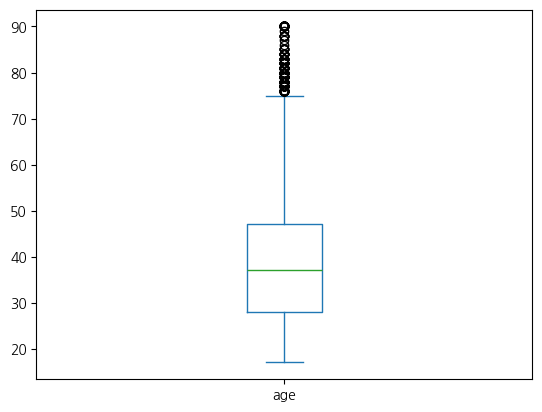

In [103]:
df['age'].plot(kind="box")

<Axes: >

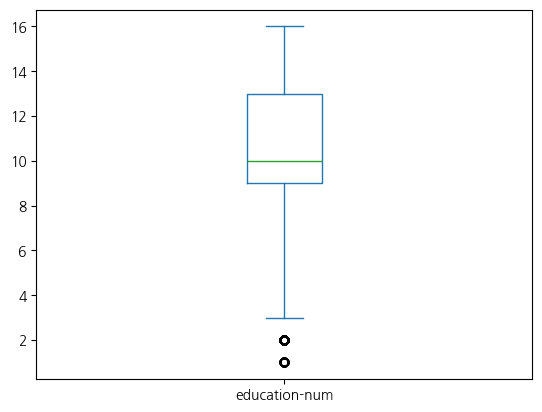

In [104]:
df['education-num'].plot(kind="box")

<Axes: >

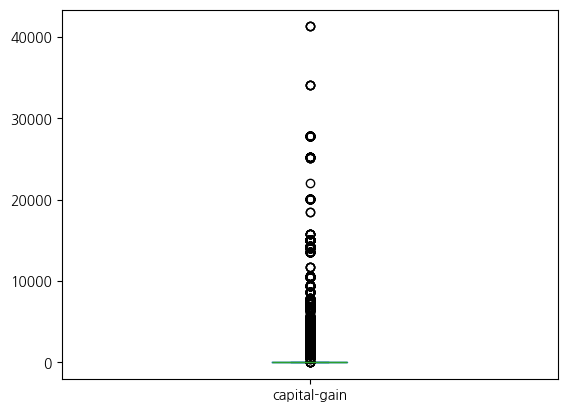

In [105]:
df['capital-gain'].plot(kind="box")

<Axes: >

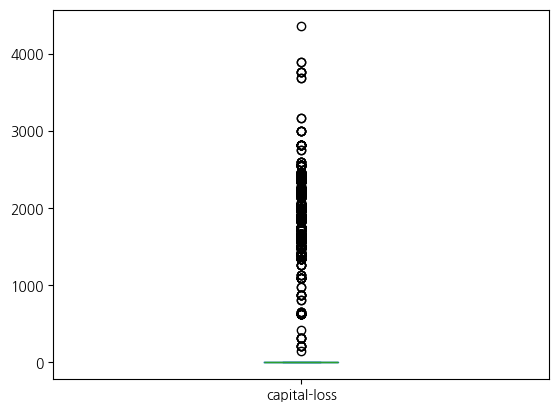

In [106]:
df['capital-loss'].plot(kind="box")

<Axes: >

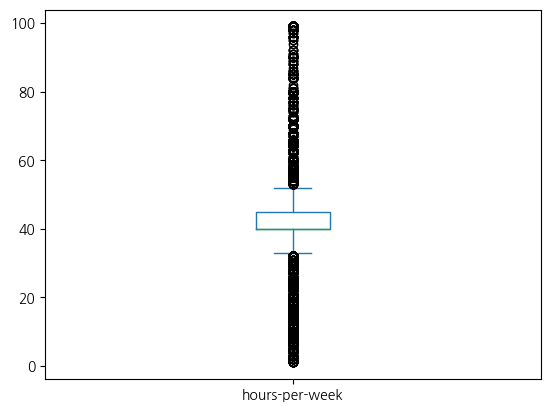

In [107]:
df['hours-per-week'].plot(kind="box")

In [336]:
# 선생님 코드
obj_cols = df.select_dtypes(include='object')
num_cols = df.select_dtypes(exclude='object')

In [339]:
# 선생님 코드 2
for col in obj_cols:
    print(f"=========== {col} =============")
    print(col, f"nunique{obj_cols[col].nunique()}")
    print()   
    print(obj_cols[col].value_counts())
    print()
    print(df[['class',col]].groupby(col).mean().sort_values(by='class',ascending=False))
    print()

=========== workclass =============
workclass nunique7

workclass
Private             33780
Self-emp-not-inc     3822
Local-gov            3129
State-gov            1977
Self-emp-inc         1635
Federal-gov          1430
Without-pay            21
Name: count, dtype: int64

                     class
workclass                 
Self-emp-inc      0.537003
Federal-gov       0.390909
Local-gov         0.294024
Self-emp-not-inc  0.271324
State-gov         0.266060
Private           0.214950
Without-pay       0.095238

=========== education =============
education nunique16

education
HS-grad         14938
Some-college    10021
Bachelors        7711
Masters          2560
Assoc-voc        1975
11th             1631
Assoc-acdm       1528
10th             1237
7th-8th           844
Prof-school       742
9th               686
12th              599
Doctorate         553
5th-6th           467
1st-4th           229
Preschool          73
Name: count, dtype: int64

                 class
education   

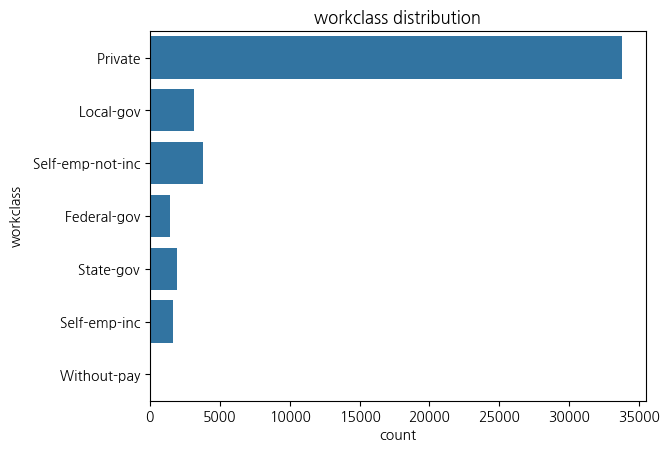

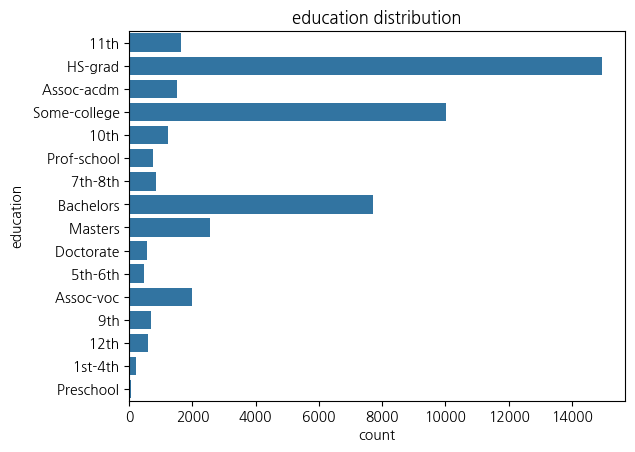

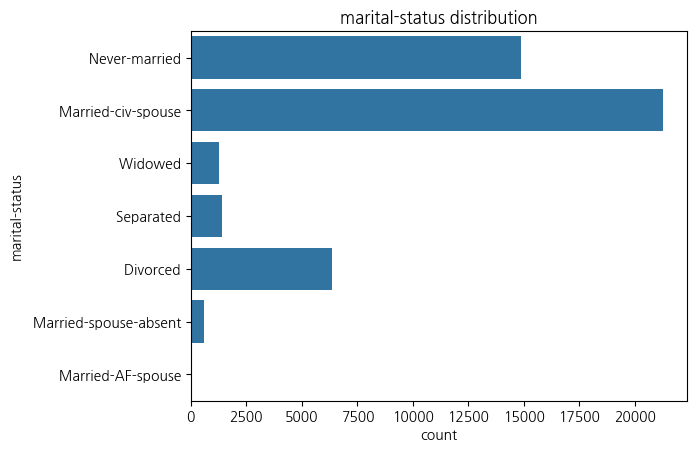

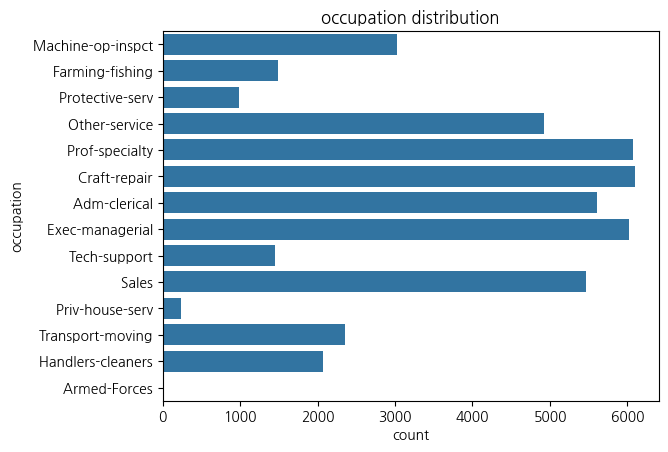

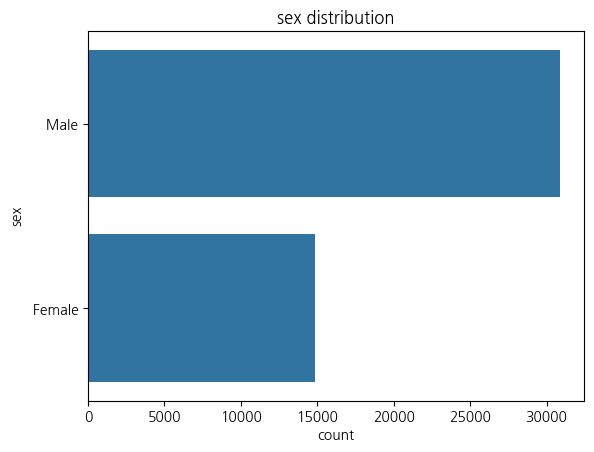

In [379]:
for col in ['workclass', 'education', 'marital-status', 'occupation', 'sex']:
    sns.countplot(y=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()


In [327]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [505]:
df['class'] = df['class'].apply(lambda x: 1 if x ==' >50K' else 0)
df[['class']]

,class
0,0
1,0
2,1
3,1
5,0
...,...
48837,0
48838,1
48839,0
48840,0


In [437]:
df[df['class']== ' <=50K']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class


In [383]:
df[['class','workclass']].groupby('workclass').mean().sort_values(by='class',ascending=False)

,class
workclass,
Self-emp-inc,0.537003
Federal-gov,0.390909
Local-gov,0.294024
Self-emp-not-inc,0.271324
State-gov,0.266060
Private,0.214950
Without-pay,0.095238


-> State-gov 지방정부는 수익이 적고 Self-emp-inc자영업 법인은 수익이 많다
-> 비율로 봤을 때는 Self-emp-inc자영업 법인은 수익이 많고 연봉없으면 수익이 낮다

In [384]:
df[['class','education']].groupby('education').mean().sort_values(by='class',ascending=False)

,class
education,
Prof-school,0.725067
Doctorate,0.716094
Masters,0.546875
Bachelors,0.413954
Assoc-acdm,0.263743
Assoc-voc,0.256203
Some-college,0.199381
HS-grad,0.160865
12th,0.076795


-> 학력이 높을수록 소득에 영향이 있다.

In [331]:
df[['class','marital-status']].groupby('marital-status').mean().sort_values(by='class',ascending=False)

,class
marital-status,
Married-civ-spouse,0.454338
Married-AF-spouse,0.437500
Divorced,0.104039
Married-spouse-absent,0.097770
Widowed,0.094136
Separated,0.069086
Never-married,0.048538


결혼 유무도 관계가 있으나 , 나이 컬럼과 비교가 필요하다.

In [198]:
df[['class','occupation']].groupby('occupation').mean().sort_values(by='class',ascending=False)

,class
occupation,
Exec-managerial,0.472005
Prof-specialty,0.441937
Armed-Forces,0.333333
Protective-serv,0.311927
Tech-support,0.289965
Sales,0.263437
Craft-repair,0.224245
Transport-moving,0.203908
Adm-clerical,0.135642


-> 직업도 유의미하다

In [199]:
df[['class','relationship']].groupby('relationship').mean().sort_values(by='class',ascending=False)

,class
relationship,
Wife,0.479981
Husband,0.451060
Not-in-family,0.102441
Unmarried,0.061523
Other-relative,0.036429
Own-child,0.015518


->역할도 관계가 있다. 비가족은 미혼과 뭐가다른지... 혼자사는 가족을 말하는건가 결혼 유무 컬럼과 유사하므로 삭제

In [200]:
df[['class','race']].groupby('race').mean().sort_values(by='class',ascending=False)

,class
race,
Asian-Pac-Islander,0.276082
White,0.258845
Black,0.124712
Amer-Indian-Eskimo,0.121839
Other,0.118280


-> 인종도 관련이 있다

In [201]:
df[['class','sex']].groupby('sex').mean().sort_values(by='class',ascending=False)

,class
sex,
Male,0.308120
Female,0.111462


-> 성별도 관련이 있다.

In [385]:
df[['class','capital-gain']].groupby('capital-gain').mean().sort_values(by='capital-gain',ascending=False)

,class
capital-gain,
41310,0.000000
34095,0.000000
27828,1.000000
25236,1.000000
25124,1.000000
...,...
914,0.000000
594,0.000000
401,0.000000


<Axes: ylabel='Frequency'>

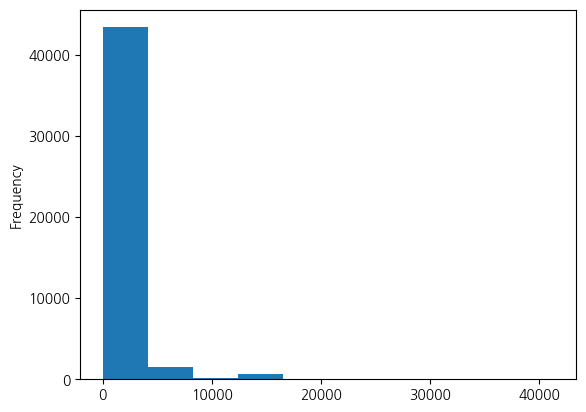

In [386]:
df['capital-gain'].plot(kind='hist')

In [387]:
df2 = df.copy()

In [396]:
df['capital-gain'] = pd.cut(df['capital-gain'],
       bins = [0, 500, 1000, 5000, 10000, 15000, 20000, 30000, 40000],
       labels=[0, 500, 1000, 5000, 10000, 15000, 20000, 30000])

In [397]:
df2[['class','capital-gain']].groupby('capital-gain').mean().sort_values(by='capital-gain',ascending=False)

,class
capital-gain,
41310,0.000000
34095,0.000000
27828,1.000000
25236,1.000000
25124,1.000000
...,...
914,0.000000
594,0.000000
401,0.000000


-> 어느정도는 관련있음

In [392]:
df[['class','capital-loss']].groupby('capital-loss').mean().sort_values(by='class',ascending=False)


,class
capital-loss,
1564,1.000000
2174,1.000000
2201,1.000000
2231,1.000000
2246,1.000000
2282,1.000000
2392,1.000000
2444,1.000000
2415,1.000000


In [393]:
df['capital-loss']= pd.cut(df['capital-loss'],
       bins = [0, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000],
       labels=[0, 500, 1000, 2000, 3000, 4000, 5000, 6000])

범주화 필요

In [395]:
df[['class','capital-loss']].groupby('capital-loss').mean().sort_values(by='class',ascending=False)

/var/folders/nx/gn9chw0937n9_jgmhqpb8xkw0000gp/T/ipykernel_50291/3481369897.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['class','capital-loss']].groupby('capital-loss').mean().sort_values(by='class',ascending=False)


,class
capital-loss,
1000,0.549136
2000,0.433409
3000,0.400000
500,0.064516
0,0.000000
4000,0.000000
5000,NaN
6000,NaN


In [345]:
df[['class','hours-per-week']].groupby('hours-per-week').mean().sort_values(by='class',ascending=False)

,class
hours-per-week,
69,1.000000
61,0.750000
76,0.750000
74,0.666667
89,0.666667
67,0.666667
86,0.500000
73,0.500000
95,0.500000


<Axes: ylabel='Frequency'>

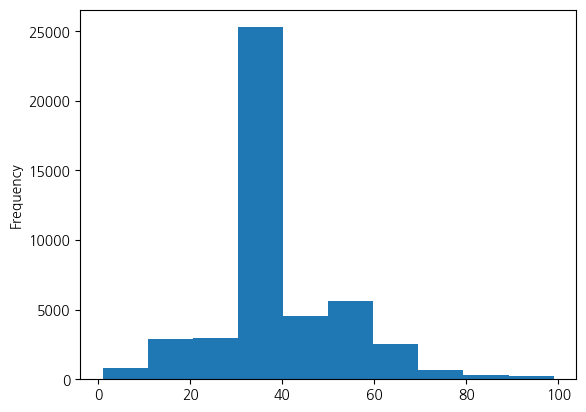

In [432]:
df['hours-per-week'].plot(kind='hist')

In [433]:
df['hours-per-week']= pd.cut(df['hours-per-week'],
       bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
       labels=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [434]:
df[['class','hours-per-week']].groupby('hours-per-week').mean().sort_values(by='class',ascending=False)

/var/folders/nx/gn9chw0937n9_jgmhqpb8xkw0000gp/T/ipykernel_50291/2580390278.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['class','hours-per-week']].groupby('hours-per-week').mean().sort_values(by='class',ascending=False)


TypeError: agg function failed [how->mean,dtype->object]

-> 노동시간과 소득은 크게 관계가 없다. 삭제

In [205]:
df[['class','native-country']].groupby('native-country').mean().sort_values(by='class',ascending=False)

,class
native-country,
France,0.444444
Taiwan,0.444444
India,0.405594
England,0.394958
Iran,0.392857
Greece,0.367347
Canada,0.364198
Yugoslavia,0.347826
Cambodia,0.346154


-> 일부 필요할 순 있겠으나... 다른 펙터랑 비교해야할거 같다. 삭제

In [438]:
df[['class','age']].groupby('age').mean().sort_values(by='class',ascending=False)

,class
age,
50,0.424789
53,0.402899
51,0.402135
54,0.401024
46,0.396825
47,0.396353
48,0.389163
44,0.382917
45,0.379794


In [439]:
df['age']= pd.cut(df['age'],
       bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
       labels=['10under', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'])

In [440]:
df[['class','age']].groupby('age').mean().sort_values(by='class',ascending=False)

/var/folders/nx/gn9chw0937n9_jgmhqpb8xkw0000gp/T/ipykernel_50291/448312481.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['class','age']].groupby('age').mean().sort_values(by='class',ascending=False)


,class
age,
40s,0.379823
50s,0.367257
30s,0.282626
60s,0.260268
80s,0.194915
70s,0.190019
20s,0.083515
10s,0.001001
10under,NaN


In [441]:
pd.set_option('display.max_rows', 100)

In [442]:
df[['class','age', 'marital-status']].groupby(['age','marital-status']).mean().sort_values(by='class',ascending=False)

/var/folders/nx/gn9chw0937n9_jgmhqpb8xkw0000gp/T/ipykernel_50291/206766959.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['class','age', 'marital-status']].groupby(['age','marital-status']).mean().sort_values(by='class',ascending=False)


class
age     marital-status                 
50s     Married-AF-spouse      1.000000
40s     Married-civ-spouse     0.550381
50s     Married-civ-spouse     0.505124
40s     Married-AF-spouse      0.500000
30s     Married-civ-spouse     0.450446
        Married-AF-spouse      0.444444
20s     Married-AF-spouse      0.437500
60s     Married-civ-spouse     0.370398
80s     Married-civ-spouse     0.320755
70s     Married-spouse-absent  0.272727
        Married-civ-spouse     0.255556
20s     Married-civ-spouse     0.244905
80s     Never-married          0.173913
70s     Divorced               0.162791
50s     Married-spouse-absent  0.157895
        Never-married          0.155779
60s     Never-married          0.152000
        Separated              0.150000
40s     Never-married          0.140909
50s     Divorced               0.138739
40s     Married-spouse-absent  0.130435
        Divorced               0.126379
        Widowed                0.109524
50s     Widowed                0.106329
20s     Widowed                0.105263
70s     Widowed                0.104938
30s     Never-married          0.094283
70s     Never-married          0.093750
30s     Married-spouse-absent  0.089820
60s     Married-spouse-absent  0.086957
40s     Separated              0.082915
30s     Divorced               0.080974
60s     Divorced               0.080537
50s     Separated              0.074468
60s     Widowed                0.073232
30s     Separated              0.066536
        Widowed                0.063291
80s     Widowed                0.060606
20s     Separated              0.029091
        Divorced               0.027982
        Never-married          0.023810
        Married-spouse-absent  0.022727
10s     Never-married          0.001042
        Divorced               0.000000
        Separated              0.000000
        Married-AF-spouse      0.000000
        Married-civ-spouse     0.000000
        Married-spouse-absent  0.000000
80s     Divorced               0.000000
70s     Separated              0.000000
80s     Married-spouse-absent  0.000000
        Separated              0.000000
10under Divorced                    NaN
        Married-AF-spouse           NaN
        Married-civ-spouse          NaN
        Married-spouse-absent       NaN
        Never-married               NaN
        Separated                   NaN
        Widowed                     NaN
10s     Widowed                     NaN
60s     Married-AF-spouse           NaN
70s     Married-AF-spouse           NaN
80s     Married-AF-spouse           NaN
90s     Divorced                    NaN
        Married-AF-spouse           NaN
        Married-civ-spouse          NaN
        Married-spouse-absent       NaN
        Never-married               NaN
        Separated                   NaN
        Widowed                     NaN

In [252]:
df[['class','education-num']].groupby('education-num').mean().sort_values(by='class',ascending=False)

,class
education-num,
15,0.725067
16,0.716094
14,0.546875
13,0.413954
12,0.263743
11,0.256203
10,0.199381
9,0.160865
8,0.076795


-> 유의미함

In [298]:
df[['class','workclass', 'occupation']].groupby(['workclass', 'occupation']).mean().sort_values(by='class',ascending=False)

class
workclass        occupation                 
Self-emp-inc     Tech-support       0.888889
                 Prof-specialty     0.731481
                 Exec-managerial    0.612313
Federal-gov      Prof-specialty     0.545817
Self-emp-inc     Sales              0.539216
Self-emp-not-inc Prof-specialty     0.534173
Federal-gov      Exec-managerial    0.522388
Without-pay      Machine-op-inspct  0.500000
                 Handlers-cleaners  0.500000
Federal-gov      Protective-serv    0.468085
Private          Exec-managerial    0.467375
Local-gov        Exec-managerial    0.462236
State-gov        Exec-managerial    0.442509
Private          Prof-specialty     0.433076
Local-gov        Protective-serv    0.424444
Self-emp-inc     Protective-serv    0.400000
State-gov        Prof-specialty     0.393312
Local-gov        Prof-specialty     0.366730
Federal-gov      Craft-repair       0.365591
                 Tech-support       0.364583
Local-gov        Tech-support       0.362069
Self-emp-not-inc Exec-managerial    0.355286
Self-emp-inc     Craft-repair       0.345455
                 Transport-moving   0.342105
Federal-gov      Armed-Forces       0.333333
Self-emp-not-inc Tech-support       0.333333
Federal-gov      Adm-clerical       0.324435
Self-emp-not-inc Sales              0.323077
State-gov        Machine-op-inspct  0.315789
Self-emp-inc     Adm-clerical       0.297872
Federal-gov      Sales              0.294118
Self-emp-inc     Machine-op-inspct  0.294118
Self-emp-not-inc Protective-serv    0.285714
Private          Tech-support       0.284475
Self-emp-inc     Farming-fishing    0.271605
Federal-gov      Transport-moving   0.270270
Local-gov        Craft-repair       0.261905
State-gov        Protective-serv    0.258621
Self-emp-inc     Other-service      0.238095
State-gov        Craft-repair       0.236559
Self-emp-not-inc Adm-clerical       0.235294
Private          Sales              0.230787
Self-emp-not-inc Transport-moving   0.224044
Private          Craft-repair       0.223676
Federal-gov      Farming-fishing    0.222222
Private          Transport-moving   0.205428
Self-emp-not-inc Machine-op-inspct  0.203390
Local-gov        Sales              0.187500
Self-emp-not-inc Craft-repair       0.174843
Local-gov        Machine-op-inspct  0.166667
Self-emp-inc     Handlers-cleaners  0.166667
State-gov        Sales              0.157895
Federal-gov      Machine-op-inspct  0.157895
Local-gov        Handlers-cleaners  0.156250
Self-emp-not-inc Farming-fishing    0.151608
State-gov        Tech-support       0.149425
Private          Protective-serv    0.147651
Local-gov        Transport-moving   0.147436
Self-emp-not-inc Handlers-cleaners  0.142857
Local-gov        Adm-clerical       0.121718
State-gov        Farming-fishing    0.120000
Private          Machine-op-inspct  0.118015
State-gov        Transport-moving   0.116667
                 Adm-clerical       0.114667
Private          Adm-clerical       0.113701
Federal-gov      Other-service      0.090909
                 Handlers-cleaners  0.083333
Self-emp-not-inc Other-service      0.072464
Local-gov        Other-service      0.063333
Private          Farming-fishing    0.062874
                 Handlers-cleaners  0.060874
State-gov        Handlers-cleaners  0.052632
                 Other-service      0.047120
Local-gov        Farming-fishing    0.046512
Private          Other-service      0.034040
                 Priv-house-serv    0.012397
Without-pay      Adm-clerical       0.000000
                 Exec-managerial    0.000000
                 Craft-repair       0.000000
                 Farming-fishing    0.000000
                 Other-service      0.000000
                 Sales              0.000000
                 Transport-moving   0.000000

In [300]:
df[['class','education-num', 'occupation']].groupby(['education-num', 'occupation']).mean().sort_values(by='class',ascending=False)

class
education-num occupation              
11            Armed-Forces         1.0
14            Armed-Forces         1.0
15            Transport-moving     1.0
              Protective-serv      1.0
16            Machine-op-inspct    1.0
...                                ...
13            Armed-Forces         0.0
15            Machine-op-inspct    0.0
14            Priv-house-serv      0.0
16            Priv-house-serv      0.0
              Transport-moving     0.0

[209 rows x 1 columns]

In [ ]:
df[['class','age', 'marital-status']].groupby(['age','marital-status']).mean().sort_values(by='class',ascending=False)

# Feature Engineering

In [645]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [25]:
df = df.drop(['education', 'hours-per-week'], axis=1)
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,United-States,>50K
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,United-States,<=50K
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,United-States,>50K
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,United-States,<=50K
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,United-States,<=50K


In [26]:
df['class'] = df['class'].apply(lambda x: 1 if x ==' >50K' else 0)
df[['class']]

,class
0,0
1,0
2,1
3,1
5,0
...,...
48837,0
48838,1
48839,0
48840,0


In [444]:
df['capital-gain'] = df['capital-gain'].apply(lambda x:1 if x== "NaN" else 0)
df['capital-gain']

0        0
1        0
2        0
3        0
5        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    0
Name: capital-gain, Length: 45794, dtype: int64

In [445]:
df['capital-gain'].unique()

array([0])

In [446]:
df['capital-loss'] = df['capital-loss'].apply(lambda x:1 if x== "NaN" else 0)
df['capital-loss']

0        0
1        0
2        0
3        0
5        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    0
Name: capital-loss, Length: 45794, dtype: int64

In [27]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,United-States,1
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,United-States,0
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,United-States,1
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,United-States,0
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,United-States,0


In [755]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       21451
Never-married            14875
Divorced                  6363
Separated                 1433
Widowed                   1296
Married-spouse-absent      583
Married-AF-spouse           32
Name: count, dtype: int64

In [756]:
df['relationship'].value_counts()

relationship
Husband           19005
Not-in-family     11916
Own-child          6706
Unmarried          4867
Wife               2139
Other-relative     1400
Name: count, dtype: int64

In [757]:
df.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'native-country', 'class'],
      dtype='object')

In [758]:
 UCA 테글러 데이터,

SyntaxError: invalid syntax (982427740.py, line 1)

In [28]:
df = pd.get_dummies(df, columns=[ 'workclass', 'marital-status', 'occupation', 'race', 'sex', 'relationship', 'native-country'], drop_first=True)

In [29]:
X= df.drop(['class'], axis=1)
y = df['class']

In [30]:
X

,age,education-num,capital-gain,capital-loss,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,7,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,6,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,9,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,9,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,9,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [31]:
y

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 46033, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,stratify=y, random_state=6)

In [36]:
X_train

,age,education-num,capital-gain,capital-loss,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
14152,64,9,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
35076,26,9,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
43856,51,7,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
25626,49,14,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7547,80,9,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31916,45,9,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
36500,24,10,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9832,30,13,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
13329,44,9,10520,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [37]:
y_train

14152    1
35076    0
43856    0
25626    1
7547     0
        ..
31916    0
36500    0
9832     0
13329    1
33346    0
Name: class, Length: 27619, dtype: int64

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [39]:

for i in range(1,11):
    dtc = DecisionTreeClassifier(random_state=i)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print('='*30,i,'='*30)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print()

============================== 1 ==============================
0.8211686760073856
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     13845
           1       0.65      0.60      0.63      4569

    accuracy                           0.82     18414
   macro avg       0.76      0.75      0.75     18414
weighted avg       0.82      0.82      0.82     18414


============================== 2 ==============================
0.8223634191376127
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     13845
           1       0.65      0.60      0.63      4569

    accuracy                           0.82     18414
   macro avg       0.76      0.75      0.76     18414
weighted avg       0.82      0.82      0.82     18414


============================== 3 ==============================
0.8219289670902574
              precision    recall  f1-score   support

           0       0.87      0.89      0

In [1]:
dtc = DecisionTreeClassifier(random_state=2)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

NameError: name 'DecisionTreeClassifier' is not defined

-> 내가 생각한대로 하면 망한다.

In [40]:
dtc = DecisionTreeClassifier(max_depth=9, random_state=2)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.8563592918431628
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     13845
           1       0.78      0.58      0.67      4569

    accuracy                           0.86     18414
   macro avg       0.83      0.76      0.79     18414
weighted avg       0.85      0.86      0.85     18414



# 다시 해보기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib 
import seaborn as sns

In [4]:
df2 = pd.read_csv("./data/salary2.csv")
df2.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [6]:
df2.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df2['workclass'].unique()

array([' Private', ' Local-gov', nan, ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [8]:
df2['workclass'].isna().sum()

np.int64(2799)

In [9]:
df2[(df2['workclass'].isna()) & (df2['class'] == ' >50K')]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
89,41,NaN,Masters,14,Married-civ-spouse,NaN,Wife,White,Female,7688,0,10,United-States,>50K
182,28,NaN,HS-grad,9,Married-civ-spouse,NaN,Own-child,White,Female,0,0,38,United-States,>50K
274,53,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,>50K
505,38,NaN,HS-grad,9,Married-civ-spouse,NaN,Wife,White,Female,0,1887,10,United-States,>50K
781,62,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,5178,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48278,60,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,12,United-States,>50K
48279,52,NaN,12th,8,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,>50K
48297,62,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,>50K
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K


In [10]:
df2[(df2['workclass'].isna()) & (df2['workclass'].isna())]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [11]:
265/len(df2[df2['class']== ' >50K']) *100

2.267476683494481

In [12]:
df2[(df2['workclass'].isna()) & (df2['workclass'].isna())|(df2['native-country'].isna())]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [13]:
3610 / len(df2) * 100

7.391179722370091

In [14]:
df2 = df2.dropna()

In [15]:
df2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [16]:
df2['class'] = df2['class'].apply(lambda x: 1 if x == ' >50K' else 0)

In [17]:
df2['class'].unique()

array([0, 1])

# 이상값 탐지

In [27]:
obj_cols = df2.select_dtypes(include = 'object')
int_cols = df2.select_dtypes(exclude = 'object')

In [28]:
obj_cols.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [29]:
important_cols = []
for col in obj_cols:

    print('-'*30,col,'-'*30)
    print(f'{col}_unique:{len(df2[col].unique())},{df2[col].unique()}')
    print(df2[col].value_counts())

    print('-'*30,col,'>50k','-'*30)
    print(df2[[col,'class']].groupby(col).mean().sort_values(by='class', ascending=False))
    result = df2[[col,'class']].groupby(col).mean().sort_values(by='class', ascending=False)
    important_cols.append(result[result['class'] >0.4 ].index)

print(important_cols)

------------------------------ workclass ------------------------------
workclass_unique:7,[' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay']
workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64
------------------------------ workclass >50k ------------------------------
                     class
workclass                 
Self-emp-inc      0.554070
Federal-gov       0.390469
Local-gov         0.295161
Self-emp-not-inc  0.278978
State-gov         0.267215
Private           0.217702
Without-pay       0.095238
------------------------------ education ------------------------------
education_unique:16,[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' 5th-6th' ' Assoc-voc' ' 9th'
 ' Doctorate' ' 12th' ' 1st-4th' 

In [30]:
important_cols

[Index([' Self-emp-inc'], dtype='object', name='workclass'),
 Index([' Prof-school', ' Doctorate', ' Masters', ' Bachelors'], dtype='object', name='education'),
 Index([' Married-civ-spouse', ' Married-AF-spouse'], dtype='object', name='marital-status'),
 Index([' Exec-managerial', ' Prof-specialty'], dtype='object', name='occupation'),
 Index([' Wife', ' Husband'], dtype='object', name='relationship'),
 Index([], dtype='object', name='race'),
 Index([], dtype='object', name='sex'),
 Index([' Taiwan', ' France', ' India'], dtype='object', name='native-country')]

------------------------------ age ------------------------------
count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64


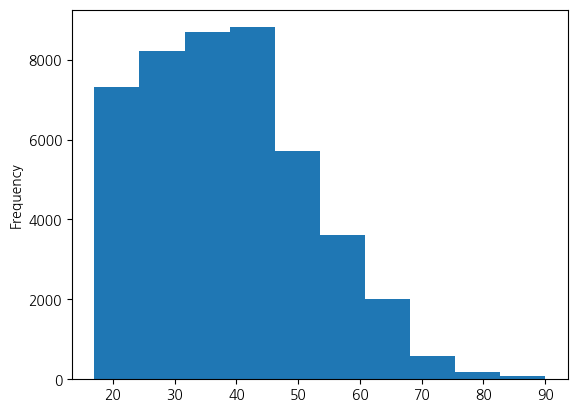

------------------------------ age >50k ------------------------------
        class
age          
50   0.436671
53   0.404935
51   0.404790
54   0.404110
46   0.403955
..        ...
18   0.000000
82   0.000000
86   0.000000
87   0.000000
89   0.000000

[74 rows x 1 columns]
------------------------------ education-num ------------------------------
count    45222.000000
mean        10.118460
std          2.552881
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education-num, dtype: float64


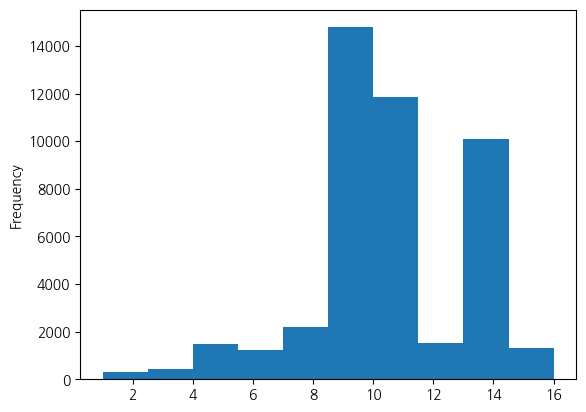

------------------------------ education-num >50k ------------------------------
                  class
education-num          
15             0.754140
16             0.733456
14             0.554097
13             0.419815
12             0.264101
11             0.257274
10             0.201030
9              0.163431
8              0.074523
6              0.067048
4              0.066829
5              0.056213
7              0.054972
3              0.048998
2              0.036036
1              0.013889
------------------------------ capital-gain ------------------------------
count    45222.000000
mean      1101.430344
std       7506.430084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


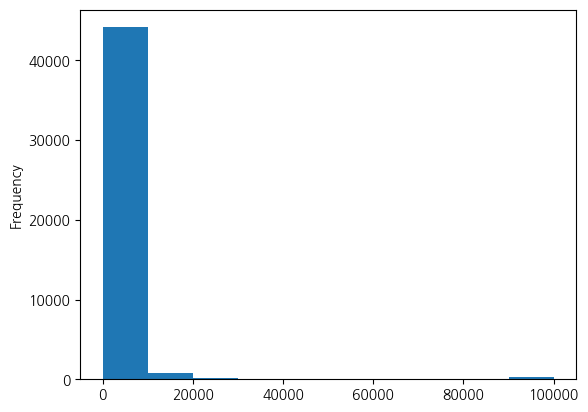

------------------------------ capital-gain >50k ------------------------------
              class
capital-gain       
7298            1.0
10605           1.0
15831           1.0
15024           1.0
15020           1.0
...             ...
7443            0.0
6849            0.0
22040           0.0
34095           0.0
41310           0.0

[121 rows x 1 columns]
------------------------------ capital-loss ------------------------------
count    45222.000000
mean        88.595418
std        404.956092
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64


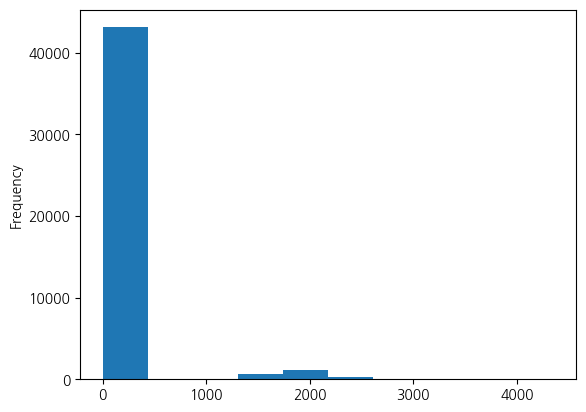

------------------------------ capital-loss >50k ------------------------------
              class
capital-loss       
1564            1.0
2174            1.0
2201            1.0
2231            1.0
2246            1.0
...             ...
2754            0.0
3175            0.0
3770            0.0
3900            0.0
4356            0.0

[97 rows x 1 columns]
------------------------------ hours-per-week ------------------------------
count    45222.000000
mean        40.938017
std         12.007508
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


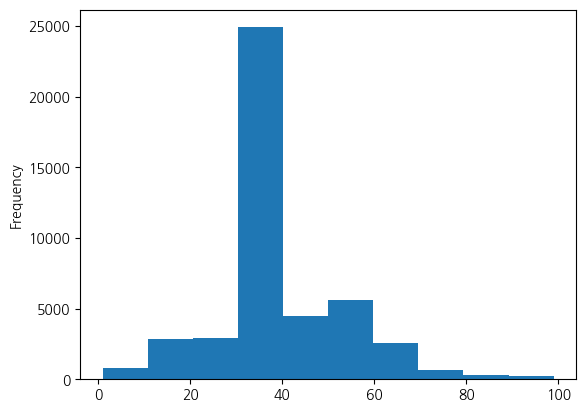

------------------------------ hours-per-week >50k ------------------------------
                   class
hours-per-week          
69              1.000000
61              0.750000
76              0.750000
74              0.666667
89              0.666667
...                  ...
82              0.000000
87              0.000000
88              0.000000
94              0.000000
91              0.000000

[96 rows x 1 columns]


In [31]:
for num in int_cols.iloc[:,:-1]:
    print('-'*30,num,'-'*30)
    print(df2[num].describe())
    int_cols[num].plot(kind='hist')
    plt.show()

    print('-'*30,num,'>50k','-'*30)
    print(df2[[num, 'class']].groupby(num).mean().sort_values(by='class', ascending=False))
    result = df2[[num, 'class']].groupby(num).mean().sort_values(by='class', ascending=False)
    important_cols.append(result[result['class'] > 0.4].index)

============================== age ==============================
count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64


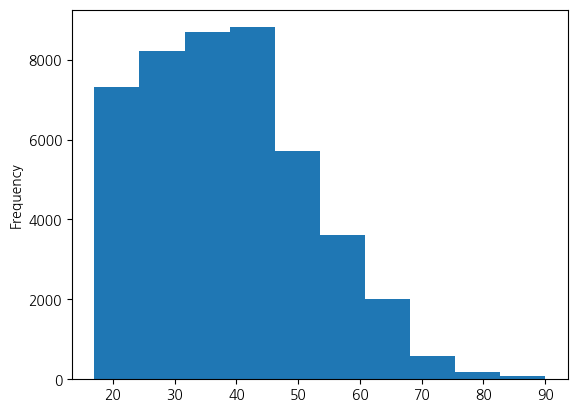

============================== age_over50k_ratio ==============================
        class
age          
50   0.436671
53   0.404935
51   0.404790
54   0.404110
46   0.403955
..        ...
18   0.000000
82   0.000000
86   0.000000
87   0.000000
89   0.000000

[74 rows x 1 columns]
============================== education-num ==============================
count    45222.000000
mean        10.118460
std          2.552881
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education-num, dtype: float64


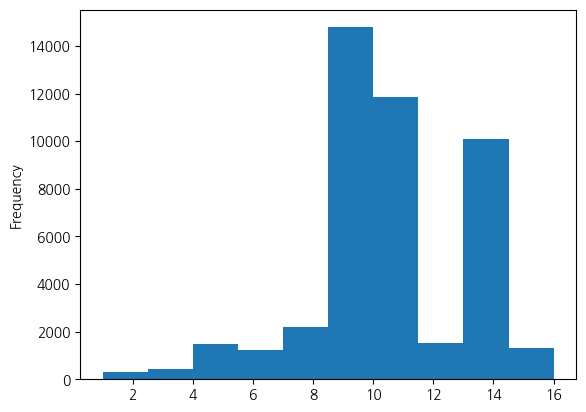

============================== education-num_over50k_ratio ==============================
                  class
education-num          
15             0.754140
16             0.733456
14             0.554097
13             0.419815
12             0.264101
11             0.257274
10             0.201030
9              0.163431
8              0.074523
6              0.067048
4              0.066829
5              0.056213
7              0.054972
3              0.048998
2              0.036036
1              0.013889
============================== capital-gain ==============================
count    45222.000000
mean      1101.430344
std       7506.430084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


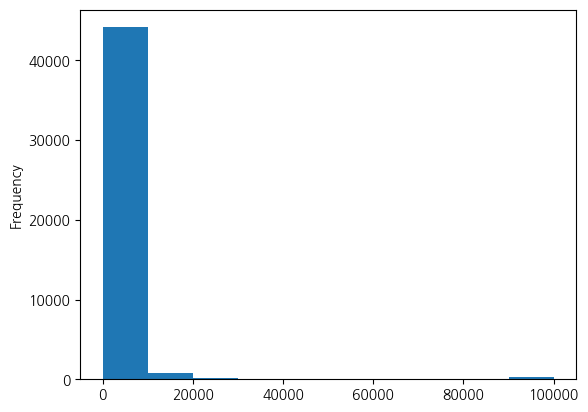

============================== capital-gain_over50k_ratio ==============================
              class
capital-gain       
7298            1.0
10605           1.0
15831           1.0
15024           1.0
15020           1.0
...             ...
7443            0.0
6849            0.0
22040           0.0
34095           0.0
41310           0.0

[121 rows x 1 columns]
============================== capital-loss ==============================
count    45222.000000
mean        88.595418
std        404.956092
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64


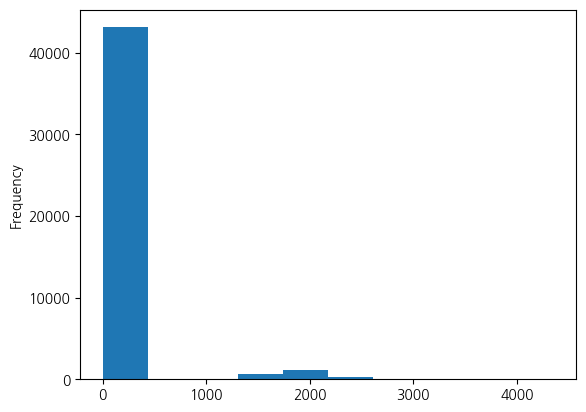

============================== capital-loss_over50k_ratio ==============================
              class
capital-loss       
1564            1.0
2174            1.0
2201            1.0
2231            1.0
2246            1.0
...             ...
2754            0.0
3175            0.0
3770            0.0
3900            0.0
4356            0.0

[97 rows x 1 columns]
============================== hours-per-week ==============================
count    45222.000000
mean        40.938017
std         12.007508
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


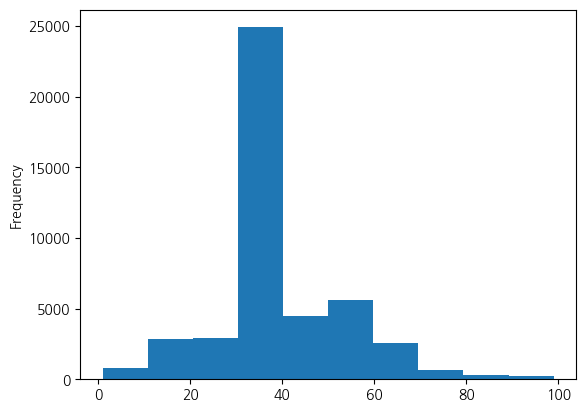

============================== hours-per-week_over50k_ratio ==============================
                   class
hours-per-week          
69              1.000000
61              0.750000
76              0.750000
74              0.666667
89              0.666667
...                  ...
82              0.000000
87              0.000000
88              0.000000
94              0.000000
91              0.000000

[96 rows x 1 columns]


In [23]:
for col in int_cols.iloc[:, :-1]:
    print("="* 30, col, "="* 30)
#     print(f"{col}, describe: {obj_cols[col].describe()}")
    print(int_cols[col].describe())
    int_cols[col].plot(kind='hist')
    plt.show()
    
    print("="* 30, f"{col}_over50k_ratio", "="* 30)
    print(df2[[col, 'class']].groupby(col).mean().sort_values(by='class', ascending=False))
    ratio_result = df2[[col, 'class']].groupby(col).mean().sort_values(by='class', ascending=False)
    important_cols.append(ratio_result[ratio_result['class'] > 0.4].index)
    print("="* 70)

In [193]:
df2[['workclass','class']].groupby('workclass').mean() >= 0.4

,class
workclass,
Federal-gov,False
Local-gov,False
Private,False
Self-emp-inc,True
Self-emp-not-inc,False
State-gov,False
Without-pay,False


In [ ]:
df2['class']

In [24]:
int_cols.iloc[:,:-1]

,age,education-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30
...,...,...,...,...,...
48837,27,12,0,0,38
48838,40,9,0,0,40
48839,58,9,0,0,40
48840,22,9,0,0,20


In [32]:
important_cols

[Index([' Self-emp-inc'], dtype='object', name='workclass'),
 Index([' Prof-school', ' Doctorate', ' Masters', ' Bachelors'], dtype='object', name='education'),
 Index([' Married-civ-spouse', ' Married-AF-spouse'], dtype='object', name='marital-status'),
 Index([' Exec-managerial', ' Prof-specialty'], dtype='object', name='occupation'),
 Index([' Wife', ' Husband'], dtype='object', name='relationship'),
 Index([], dtype='object', name='race'),
 Index([], dtype='object', name='sex'),
 Index([' Taiwan', ' France', ' India'], dtype='object', name='native-country'),
 Index([50, 53, 51, 54, 46, 47], dtype='int64', name='age'),
 Index([15, 16, 14, 13], dtype='int64', name='education-num'),
 Index([ 7298, 10605, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 20051,
        25124, 25236, 27828, 99999, 18481,  8614,  9386,  4687,  4787,  5178,
         4934,  6418,  6514,  6097,  5556,  9562, 10520,  7262,  7688,  7430,
         3103,  4386,  7896],
       dtype='int64', name='capital-gain'),

In [33]:
final_cols = []
for col in important_cols:
    if len(col) != 0:
        print(col.name, col.values)
        final_cols.append(col.name)
final_cols

workclass [' Self-emp-inc']
education [' Prof-school' ' Doctorate' ' Masters' ' Bachelors']
marital-status [' Married-civ-spouse' ' Married-AF-spouse']
occupation [' Exec-managerial' ' Prof-specialty']
relationship [' Wife' ' Husband']
native-country [' Taiwan' ' France' ' India']
age [50 53 51 54 46 47]
education-num [15 16 14 13]
capital-gain [ 7298 10605 15831 15024 15020 14344 14084 13550 11678 20051 25124 25236
 27828 99999 18481  8614  9386  4687  4787  5178  4934  6418  6514  6097
  5556  9562 10520  7262  7688  7430  3103  4386  7896]
capital-loss [1564 2174 2201 2231 2246 2282 2392 2444 2415 2472 3004 1977 1911 1887
 2547 2824 2559 1848 1755 1825 1902 1485  653 3683 2377 2258]
hours-per-week [69 61 76 74 89 67 86 95 97 55 50 60 57 90 65 80]


['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'native-country',
 'age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [34]:
data_set1 = df2[final_cols]
data_set1 = data_set1.drop('education', axis=1)
data_set1

,workclass,marital-status,occupation,relationship,native-country,age,education-num,capital-gain,capital-loss,hours-per-week
0,Private,Never-married,Machine-op-inspct,Own-child,United-States,25,7,0,0,40
1,Private,Married-civ-spouse,Farming-fishing,Husband,United-States,38,9,0,0,50
2,Local-gov,Married-civ-spouse,Protective-serv,Husband,United-States,28,12,0,0,40
3,Private,Married-civ-spouse,Machine-op-inspct,Husband,United-States,44,10,7688,0,40
5,Private,Never-married,Other-service,Not-in-family,United-States,34,6,0,0,30
...,...,...,...,...,...,...,...,...,...,...
48837,Private,Married-civ-spouse,Tech-support,Wife,United-States,27,12,0,0,38
48838,Private,Married-civ-spouse,Machine-op-inspct,Husband,United-States,40,9,0,0,40
48839,Private,Widowed,Adm-clerical,Unmarried,United-States,58,9,0,0,40
48840,Private,Never-married,Adm-clerical,Own-child,United-States,22,9,0,0,20


In [35]:
X = pd.get_dummies(data_set1, drop_first=True)
y = df2['class']

In [36]:
X

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,7,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,6,0,0,30,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,9,0,0,20,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [37]:
y

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 45222, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, stratify = y, random_state=10)

In [40]:
X_train

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
1596,43,11,0,0,60,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
37177,41,13,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
38740,33,7,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
46405,52,9,0,0,45,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
43818,46,13,0,0,55,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,29,13,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1702,45,11,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36563,50,13,0,0,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
85,43,9,0,0,44,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [44]:
dtc = DecisionTreeClassifier(random_state = 10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.819669412350047
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     13606
           1       0.64      0.61      0.63      4483

    accuracy                           0.82     18089
   macro avg       0.76      0.75      0.75     18089
weighted avg       0.82      0.82      0.82     18089



# 모델 성능 튜닝

In [45]:
for i in range(1, 21):
    dtc = DecisionTreeClassifier(max_depth=i, random_state = 10)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print('-'*30,i,'-'*30)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print()

------------------------------ 1 ------------------------------
0.7521698269666648
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     13606
           1       0.00      0.00      0.00      4483

    accuracy                           0.75     18089
   macro avg       0.38      0.50      0.43     18089
weighted avg       0.57      0.75      0.65     18089


------------------------------ 2 ------------------------------
0.8239814251755211
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     13606
           1       0.72      0.47      0.57      4483

    accuracy                           0.82     18089
   macro avg       0.78      0.70      0.73     18089
weighted avg       0.81      0.82      0.81     18089


------------------------------ 3 ------------------------------
0.8384653656918569
              precision    recall  f1-score   support

           0       0.86      0.94      0

/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

------------------------------ 4 ------------------------------
0.8382995190447233
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     13606
           1       0.74      0.53      0.62      4483

    accuracy                           0.84     18089
   macro avg       0.80      0.73      0.76     18089
weighted avg       0.83      0.84      0.83     18089


------------------------------ 5 ------------------------------
0.8440488694786887
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     13606
           1       0.79      0.51      0.62      4483

    accuracy                           0.84     18089
   macro avg       0.82      0.73      0.76     18089
weighted avg       0.84      0.84      0.83     18089


------------------------------ 6 ------------------------------
0.8475869312842059
              precision    recall  f1-score   support

           0       0.86      0.95      0

In [46]:
dtc = DecisionTreeClassifier(max_depth=11,random_state = 10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8526728951296368
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     13606
           1       0.76      0.60      0.67      4483

    accuracy                           0.85     18089
   macro avg       0.82      0.77      0.79     18089
weighted avg       0.85      0.85      0.85     18089



# 의사결정나무 시각화

In [47]:
from sklearn.tree import plot_tree

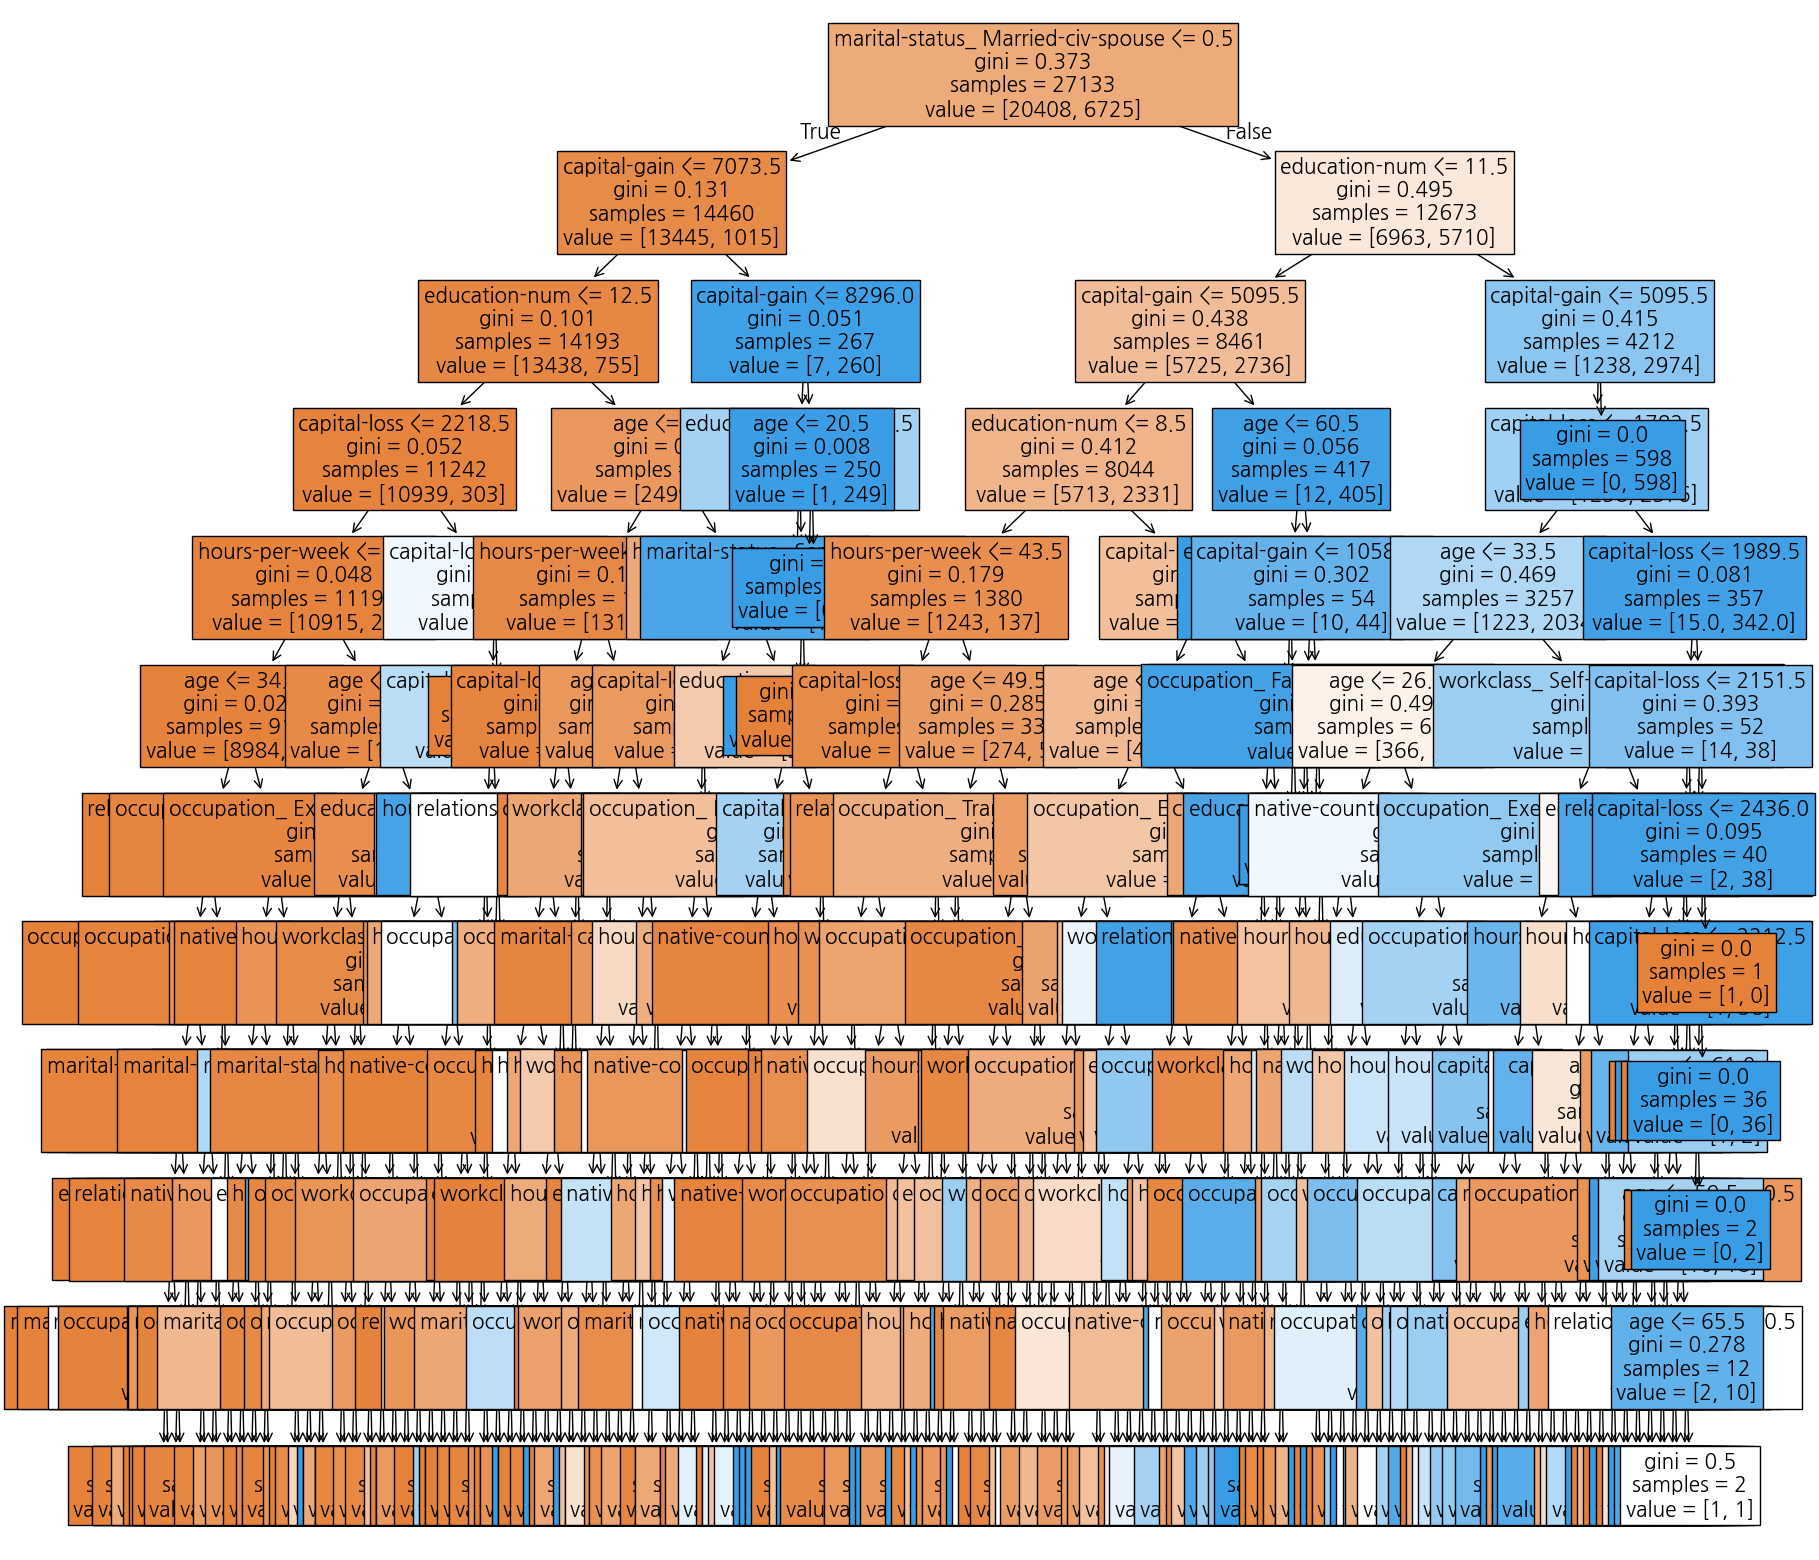

In [51]:
plt.figure(figsize=(20,20))
plot_tree(dtc, feature_names=dtc.feature_names_in_, max_depth=11, fontsize=15, filled=True)
plt.show()

# 데이터 분석 모델의 성능평가

1. accuracy(정확도/정분류율): 1을 1이라고맞추고 0을 0이라고 맞춘 비율
2. False Positive Rate(오분류율): 1을 0이라고 예측하고 0을 1이라고 예측해서 잘못 예측한 것
3. precision(정밀도): 예측한 것중에서 실제로 맞은 것, 에측 positive 중에서 실제 positive인 바율, 예측을 잘 하는 모델 
4. recall(재현율/민감도): 실제값을 실제값으로 잘 예측한 것. 실제 positive 중에서 예측 positive 가 맞은 것 정밀도와 값을 나눈다, 실제값을 잘 찾는 모델 
5. F1-Score: precision과 recall의 조화 평균값. 둘다 반영
6. Specificity(특이도): 실제 nagative 중 예측에 성공한 비율. 뭐랑 반비례 한다함

# confusion matrix(혼동행렬)
#### 이것은 R 기준 도표이다 
|            | 예측 positive   | 예측 nagative     |
|:------------:|:----------------:|:------------------:|
|**실제 positive**|TP(True Positive)|FN(False Nagative)|
|**실제 Nagative**|FP(False Positive)|TN(True Nagative)|
#### 이것은 파이썬 기준 도표이다 
|            | 예측 nagative   | 예측positive    |
|:------------:|:----------------:|:------------------:|
|**실제 Nagative**| TN(True Nagative)|FP(False Positive)|
|**실제 positive**|FN(False Nagative)|TP(True Positive))|
* TP : 실제 Positive, 예측 Nagative(실제 연봉 >5만, 예측 연봉 >5만)
* TN : 실제 Nagative, 예측 Positive(실제 연봉 <=5만, 예측연봉 >5만)
* FP(1형 오류): 실제 Nagative, 예측 Positive(실제 연봉 <=5만, 예측연봉 >5만)  
* FN(2형 오류): 실제 Positive, 예측 Nagative(실제 연봉 >5만, 예측연봉 <=5만)


* 정확도(accuracy_score): $ TP + TN \over TP+TN+FP+FN $
* 오분류율(FPR): $ FP+FN \over TP+TN+FP+FN $
* 정밀도(precision): $ TP \over TP+FP $ 예측값이 중요한것
* 재현율/민감도(recall): $ TP \over TP+FN $ 실제값이 중요한것 (암진단)
* 특이도(Specificity): $ TN \over FP+TN $
* F1-score: $  2 \cdot {Precision \cdot Recall \over Precision + Recall} $   

# Dataset 2: 모든 컬럼을 다 넣고 분석해보기 

In [52]:
	len(data_set1.columns)

10

In [53]:
len(df2.columns)

14

In [55]:
X2 = df2.drop('class', axis=1)
X2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [56]:
y

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 45222, dtype: int64

In [57]:
X2 = pd.get_dummies(X2, drop_first=True)
X2

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,7,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,6,0,0,30,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,9,0,0,20,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [58]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.4, random_state=10)

In [59]:
	
X2_train

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
15331,32,9,0,0,55,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
37036,19,10,0,0,35,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
39941,17,6,594,0,30,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3262,54,13,0,0,35,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
25115,23,13,0,0,30,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43252,38,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
30274,33,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31544,49,5,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
43254,51,9,7298,0,50,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [60]:
	
dtc2 = DecisionTreeClassifier(random_state=10)
dtc2.fit(X2_train, y2_train)
pred2 = dtc2.predict(X2_test)
print(accuracy_score(y2_test, pred2))
print(classification_report(y2_test, pred2))

0.8133672397589695
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     13580
           1       0.63      0.60      0.62      4509

    accuracy                           0.81     18089
   macro avg       0.75      0.74      0.75     18089
weighted avg       0.81      0.81      0.81     18089



In [61]:
	
for i in range(1, 31):
    dtc2 = DecisionTreeClassifier(max_depth=i, random_state=10)
    dtc2.fit(X2_train, y2_train)
    pred2 = dtc2.predict(X2_test)
    print("="* 30, "max_depth", i, "="* 30)
    print(accuracy_score(y2_test, pred2))
    print(classification_report(y2_test, pred2))
    print()

============================== max_depth 1 ==============================
0.7507324893581735
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     13580
           1       0.00      0.00      0.00      4509

    accuracy                           0.75     18089
   macro avg       0.38      0.50      0.43     18089
weighted avg       0.56      0.75      0.64     18089


============================== max_depth 2 ==============================
0.8253634805683012
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     13580
           1       0.73      0.48      0.58      4509

    accuracy                           0.83     18089
   macro avg       0.79      0.71      0.73     18089
weighted avg       0.82      0.83      0.81     18089


============================== max_depth 3 ==============================
0.839018187848969
              precision    recall  f1-score   support

           

/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

============================== max_depth 4 ==============================
0.8429432251644646
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     13580
           1       0.74      0.56      0.64      4509

    accuracy                           0.84     18089
   macro avg       0.81      0.75      0.77     18089
weighted avg       0.84      0.84      0.84     18089


============================== max_depth 5 ==============================
0.8468682624799602
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     13580
           1       0.77      0.55      0.64      4509

    accuracy                           0.85     18089
   macro avg       0.82      0.75      0.77     18089
weighted avg       0.84      0.85      0.84     18089


============================== max_depth 6 ==============================
0.8502404776383438
              precision    recall  f1-score   support

          

In [62]:
dtc2 = DecisionTreeClassifier(max_depth= 12, random_state=10)
dtc2.fit(X2_train, y2_train)
pred2 = dtc2.predict(X2_test)
print(accuracy_score(y2_test, pred2))
print(classification_report(y2_test, pred2))

0.8519542263253911
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     13580
           1       0.74      0.62      0.68      4509

    accuracy                           0.85     18089
   macro avg       0.81      0.78      0.79     18089
weighted avg       0.85      0.85      0.85     18089



In [63]:
	
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8526728951296368
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     13606
           1       0.76      0.60      0.67      4483

    accuracy                           0.85     18089
   macro avg       0.82      0.77      0.79     18089
weighted avg       0.85      0.85      0.85     18089



# EDA를 간편하게 하자
* ydata
* https://github.com/ydataai/ydata-profiling

In [41]:
from ydata_profiling import ProfileReport

/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
profile = ProfileReport(df, title="Profiling Report")

In [52]:
profile.to_file("salary2_eda.html")

Summarize dataset:   0%| | 0/19 [00:00<?, ?it/s, Describe variable: education-nu
Summarize dataset:  32%|▎| 6/19 [00:00<00:01,  7.92it/s, Describe variable: capi
Summarize dataset:  37%|▎| 7/19 [00:01<00:02,  5.94it/s, Describe variable: capi
Summarize dataset:  47%|▍| 9/19 [00:01<00:01,  6.16it/s, Describe variable: hour
Summarize dataset:  58%|▌| 11/19 [00:01<00:01,  6.11it/s, Describe variable: cla
Export report to file: 100%|█████████████████████| 1/1 [00:00<00:00, 117.19it/s]


y-data의 결과를 통해 데이터 전처리

In [65]:
df3 = df2.copy()

In [66]:
df3 = df3.dropna()
df3

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [67]:
df3[df3.duplicated()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
595,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,0
653,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,0
741,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
864,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,0
1131,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48784,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
48793,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,0
48808,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1


In [78]:
df3 = df3.drop_duplicates()

In [79]:
df3.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'class'],
      dtype='object')

In [80]:
df3 = df3.drop(['education', 'relationship'], axis=1)
df3

KeyError: "['education', 'relationship'] not found in axis"

In [81]:
df3= df3.reset_index(drop=True)

In [82]:
df3

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,1
4,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37783,32,Private,14,Never-married,Tech-support,Asian-Pac-Islander,Male,0,0,11,Taiwan,0
37784,53,Private,14,Married-civ-spouse,Exec-managerial,White,Male,0,0,40,United-States,1
37785,27,Private,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,0
37786,58,Private,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,0


In [83]:
X3 = pd.get_dummies(df3,drop_first=True)
y3 = X3['class_ >50K']
X3 = X3.drop('class_ >50K', axis=1)


KeyError: 'class_ >50K'

In [74]:
X3

,age,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,7,0,0,40,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,1,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,53,14,0,0,40,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
39236,22,10,0,0,40,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
39237,27,12,0,0,38,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
39238,58,9,0,0,40,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [97]:
y3

0        False
1        False
2         True
3         True
4        False
         ...  
39235     True
39236    False
39237    False
39238    False
39239     True
Name: class_ >50K, Length: 39240, dtype: bool

In [104]:
X3_train,X3_test, y3_train, y3_test =  train_test_split(X3,y3, test_size=0.4, stratify=y3, random_state=10)

In [105]:
for i in range(1,31):
    dtc3 = DecisionTreeClassifier(max_depth=i, random_state=10)
    dtc3.fit(X3_train, y3_train)
    pred3 = dtc3.predict(X3_test)
    print(f"++++++++++++++max_depth={i}+++++++++++++++")
    print(accuracy_score(y3_test, pred3))
    print(classification_report(y3_test, pred3))
    print()


++++++++++++++max_depth=1+++++++++++++++
0.7457951070336392
              precision    recall  f1-score   support

       False       0.75      1.00      0.85     11706
        True       0.00      0.00      0.00      3990

    accuracy                           0.75     15696
   macro avg       0.37      0.50      0.43     15696
weighted avg       0.56      0.75      0.64     15696


++++++++++++++max_depth=2+++++++++++++++
0.8162589194699287
              precision    recall  f1-score   support

       False       0.83      0.94      0.88     11706
        True       0.73      0.44      0.55      3990

    accuracy                           0.82     15696
   macro avg       0.78      0.69      0.72     15696
weighted avg       0.81      0.82      0.80     15696


++++++++++++++max_depth=3+++++++++++++++
0.8333333333333334


/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

              precision    recall  f1-score   support

       False       0.85      0.94      0.89     11706
        True       0.75      0.51      0.61      3990

    accuracy                           0.83     15696
   macro avg       0.80      0.73      0.75     15696
weighted avg       0.83      0.83      0.82     15696


++++++++++++++max_depth=4+++++++++++++++
0.8336518858307849
              precision    recall  f1-score   support

       False       0.85      0.94      0.89     11706
        True       0.75      0.51      0.61      3990

    accuracy                           0.83     15696
   macro avg       0.80      0.73      0.75     15696
weighted avg       0.83      0.83      0.82     15696


++++++++++++++max_depth=5+++++++++++++++
0.8418068297655453
              precision    recall  f1-score   support

       False       0.85      0.95      0.90     11706
        True       0.78      0.52      0.63      3990

    accuracy                           0.84     15696
   mac

In [ ]:
dtc3 = DecisionTreeClassifier(max_depth=8, random_state=10)
dtc3.fit(X3_train, y3_train)
pred3 = dtc3.predict(X3_test)
print(accuracy_score(y3_test, pred3))
print(classification_report(y3_test, pred3))

In [ ]:
print(classification_report(y_test, pred))
print(classification_report(y2_test, pred2))
print(classification_report(y3_test, pred3))

배깅, 부스팅, 랜덤배깅

# 배깅
* 데이터셋에서 복원추출방법으로 부트스트랩을 여러개 만들고 각각의 부트스트랩을 분류기(의사결정나무)에 넣고 나온 결과를 다수결로 결정하는 방법
* 독립된 부트스트랩, 독립된 모델로 결과를 도출
* 투표를 통해 결정

In [106]:
from sklearn.ensemble import BaggingClassifier

In [108]:
bc =  BaggingClassifier(n_estimators=10,n_jobs=10,random_state=10,)
bc.fit(X3_train,y3_train)
pred = bc.predict(X3_test)
print(accuracy_score(y3_test, pred))
print(classification_report(y3_test, pred))

0.827025993883792
              precision    recall  f1-score   support

       False       0.87      0.90      0.89     11706
        True       0.68      0.60      0.64      3990

    accuracy                           0.83     15696
   macro avg       0.78      0.75      0.76     15696
weighted avg       0.82      0.83      0.82     15696



In [114]:
est = DecisionTreeClassifier(max_depth=9, random_state=10)
bc =  BaggingClassifier(estimator=est,n_estimators=100,n_jobs=10,random_state=10,)
bc.fit(X3_train,y3_train)
pred = bc.predict(X3_test)
print(accuracy_score(y3_test, pred))
print(classification_report(y3_test, pred))

0.8529561671763507
              precision    recall  f1-score   support

       False       0.87      0.94      0.91     11706
        True       0.78      0.59      0.67      3990

    accuracy                           0.85     15696
   macro avg       0.82      0.77      0.79     15696
weighted avg       0.85      0.85      0.85     15696



# 부스팅
* 처음 만든 부트스트랩을 분석한 후 정답은 제외하고 틀린 것만 모아서 다시 부트스트랩 만들고 공부 후 틀린 것을 다시 공부하는 것.
* 점진적으로 성능이 향상되는 알고리즘
* XGBoost, LightGMB, CatBoost

In [117]:
from sklearn.ensemble import AdaBoostClassifier

In [122]:
abc = AdaBoostClassifier(n_estimators=500, learning_rate=0.5 ,random_state=10)
abc.fit(X3_train,y3_train)
pred = abc.predict(X3_test)
print(accuracy_score(y3_test, pred))
print(classification_report(y3_test, pred))

0.8459480122324159
              precision    recall  f1-score   support

       False       0.86      0.94      0.90     11706
        True       0.77      0.56      0.65      3990

    accuracy                           0.85     15696
   macro avg       0.82      0.75      0.78     15696
weighted avg       0.84      0.85      0.84     15696



# 그래디언트 부스트
* 결과는 xg보다 잘나오기도 한다.
* 너무 느림

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

In [125]:
gbc = GradientBoostingClassifier(n_estimators=100,random_state=10)
gbc.fit(X3_train,y3_train)
pred = gbc.predict(X3_test)
print(accuracy_score(y3_test, pred))
print(classification_report(y3_test, pred))

0.8574159021406728
              precision    recall  f1-score   support

       False       0.87      0.94      0.91     11706
        True       0.79      0.60      0.68      3990

    accuracy                           0.86     15696
   macro avg       0.83      0.77      0.80     15696
weighted avg       0.85      0.86      0.85     15696



# XGBOOST
* 병렬연산이 가능해서 처리속도가 매우 빨라짐
* 따로 설치 필요
* pip install xgboost

In [126]:
from xgboost import XGBClassifier

In [130]:
for i in range(1,20): 
    xgb = XGBClassifier(max_depth=i,n_estimators=100,random_state=10)
    xgb.fit(X3_train,y3_train)
    pred = xgb.predict(X3_test)
    print( '-'*30, f'max_depth={i}', '-'*30)
    print(accuracy_score(y3_test, pred))
    print(classification_report(y3_test, pred))

------------------------------ max_depth=1 ------------------------------
0.8489424057084608
              precision    recall  f1-score   support

       False       0.87      0.94      0.90     11706
        True       0.78      0.57      0.66      3990

    accuracy                           0.85     15696
   macro avg       0.82      0.76      0.78     15696
weighted avg       0.84      0.85      0.84     15696

------------------------------ max_depth=2 ------------------------------
0.860474006116208
              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11706
        True       0.78      0.63      0.70      3990

    accuracy                           0.86     15696
   macro avg       0.83      0.78      0.80     15696
weighted avg       0.86      0.86      0.86     15696

------------------------------ max_depth=3 ------------------------------
0.8641692150866462
              precision    recall  f1-score   support

       False 

In [138]:
%%time
xgb = XGBClassifier(max_depth=6,n_estimators=1000,random_state=10)
xgb.fit(X3_train,y3_train)
pred = xgb.predict(X3_test)
print(accuracy_score(y3_test, pred))
print(classification_report(y3_test, pred))

0.8459480122324159
              precision    recall  f1-score   support

       False       0.89      0.91      0.90     11706
        True       0.71      0.66      0.68      3990

    accuracy                           0.85     15696
   macro avg       0.80      0.78      0.79     15696
weighted avg       0.84      0.85      0.84     15696

CPU times: user 6.34 s, sys: 223 ms, total: 6.56 s
Wall time: 2.21 s


# LightGBM
* xgboost보다 속도를 더 빠르게
* 비대칭 트리 만듦
* 일반적으로는 균형트리, 잘 맞추는 쪽으로만 내려감

In [132]:
from lightgbm import LGBMClassifier

In [137]:
%%time
lgbm = LGBMClassifier(n_estimators=1000,n_jobs=10, random_state=10)
lgbm.fit(X3_train,y3_train)
pred = lgbm.predict(X3_test)
print(accuracy_score(y3_test, pred))
print(classification_report(y3_test, pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5985, number of negative: 17559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254205 -> initscore=-1.076310
[LightGBM] [Info] Start training from score -1.076310
0.851618246687054
              precision    recall  f1-score   support

       False       0.89      0.92      0.90     11706
        True       0.73      0.66      0.69      3990

    accuracy                           0.85     15696
   macro avg       0.81      0.79      0.80     15696
weighted avg       0.85      0.85      0.85     15696

CPU times: user 6.6

In [139]:
from catboost import CatBoostClassifier

In [140]:
%%time
cbc = CatBoostClassifier(n_estimators=1000,random_state=10)
cbc.fit(X3_train,y3_train)
pred = cbc.predict(X3_test)
print(accuracy_score(y3_test, pred))
print(classification_report(y3_test, pred))

Learning rate set to 0.039694
0:	learn: 0.6546869	total: 76ms	remaining: 1m 15s
1:	learn: 0.6221823	total: 83.5ms	remaining: 41.7s
2:	learn: 0.5903892	total: 88ms	remaining: 29.2s
3:	learn: 0.5625625	total: 97.1ms	remaining: 24.2s
4:	learn: 0.5373299	total: 107ms	remaining: 21.3s
5:	learn: 0.5157417	total: 113ms	remaining: 18.7s
6:	learn: 0.4976091	total: 121ms	remaining: 17.1s
7:	learn: 0.4796748	total: 125ms	remaining: 15.5s
8:	learn: 0.4656218	total: 128ms	remaining: 14.1s
9:	learn: 0.4532493	total: 132ms	remaining: 13.1s
10:	learn: 0.4413969	total: 135ms	remaining: 12.1s
11:	learn: 0.4308728	total: 139ms	remaining: 11.4s
12:	learn: 0.4210773	total: 142ms	remaining: 10.7s
13:	learn: 0.4126360	total: 145ms	remaining: 10.2s
14:	learn: 0.4060975	total: 149ms	remaining: 9.8s
15:	learn: 0.3988096	total: 152ms	remaining: 9.35s
16:	learn: 0.3922285	total: 156ms	remaining: 9.02s
17:	learn: 0.3865721	total: 160ms	remaining: 8.72s
18:	learn: 0.3815392	total: 165ms	remaining: 8.53s
19:	learn: 

# 랜덤 배깅(RandomForest)

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
%%time
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=10, random_state=10)
rfc.fit(X3_train,y3_train)
pred = rfc.predict(X3_test)
print(accuracy_score(y3_test, pred))
print(classification_report(y3_test, pred))

0.8282364933741081
              precision    recall  f1-score   support

       False       0.87      0.91      0.89     11706
        True       0.68      0.60      0.64      3990

    accuracy                           0.83     15696
   macro avg       0.78      0.75      0.76     15696
weighted avg       0.82      0.83      0.82     15696

CPU times: user 33.6 s, sys: 3.9 s, total: 37.5 s
Wall time: 12.7 s


In [144]:
for i in range(1,21):
    rfc = RandomForestClassifier(max_depth=i, n_estimators=1000, n_jobs=10, random_state=10)
    rfc.fit(X3_train,y3_train)
    pred = rfc.predict(X3_test)
    print( '-'*30, f'max_depth={i}', '-'*30)
    print(accuracy_score(y3_test, pred))
    print(classification_report(y3_test, pred))

------------------------------ max_depth=1 ------------------------------
0.7457951070336392
              precision    recall  f1-score   support

       False       0.75      1.00      0.85     11706
        True       0.00      0.00      0.00      3990

    accuracy                           0.75     15696
   macro avg       0.37      0.50      0.43     15696
weighted avg       0.56      0.75      0.64     15696



/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

------------------------------ max_depth=2 ------------------------------
0.7571355759429154
              precision    recall  f1-score   support

       False       0.75      1.00      0.86     11706
        True       0.99      0.04      0.09      3990

    accuracy                           0.76     15696
   macro avg       0.87      0.52      0.47     15696
weighted avg       0.82      0.76      0.66     15696

------------------------------ max_depth=3 ------------------------------
0.7841488277268094
              precision    recall  f1-score   support

       False       0.78      1.00      0.87     11706
        True       0.99      0.15      0.26      3990

    accuracy                           0.78     15696
   macro avg       0.88      0.58      0.57     15696
weighted avg       0.83      0.78      0.72     15696

------------------------------ max_depth=4 ------------------------------
0.8019877675840978
              precision    recall  f1-score   support

       False